<div style='background-color: #ffc154;
    border: 0.5em solid black;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Devoir maison</h2>
    <h1>Générateur de labyrinthes parfaits</h1>
</div>

Un labyrinthe parfait est un labyrinthe construit de sorte que toutes les cases soient reliées à toutes les cases par un chemin unique.

<img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/labyrinthe_parfait.svg" width="60%">

L'objectif de ce devoir est de générer des labyrinthes parfaits en s'appuyant sur la méthode _diviser pour régner_.

Le module `drawSvg`, qui peut être installé en exécutant la cellule suivante, sera utilisé pour obtenir une représentation des labyrinthes au format SVG (_Scalable Vector Graphics_, format d'images vectorielles).

In [ ]:
import sys
!{sys.executable} -m pip install drawSvg

In [1]:
import drawSvg as draw

<div style='background-color: #ffc154;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Création de deux classes</h2>
</div>

**(1)** Définir une classe `Case` dont les instances possèdent quatre attributs booléens `N`, `S`, `O` et `E` qui représentent la présence ou l'absence de mur au dessus, en dessous, à gauche et à droite de la case.

`True` signifie la présence d'un mur et `False` l'absence de mur.

Par défaut, lors de la création d'une instance de la classe `Case`, les quatre murs sont présents.

In [2]:
class Case:
    def __init__(self):
        self.N = True
        self.S = True
        self.O = True
        self.E = True

**(2)** Définir l'ébauche d'une classe `Labyrinthe` dont les instances possèdent trois attributs :
- `nb_l` (entier passé en paramètre du constructeur, nombre de lignes du labyrinthe),
- `nb_c` (entier passé en paramètre du constructeur, nombre de colonnes du labyrinthe),
- `cases` (tableau à deux dimensions, de taille `nb_l` par `nb_c`, dont les éléments sont par défaut des instances de la classe `Case` pour lesquelles les quatre murs sont présents).

In [3]:
class Labyrinthe:
    def __init__(self, nb_l, nb_c):
        self.hauteur = nb_l
        self.largeur = nb_c
        self.cases = [[Case() for j in range(self.largeur)] for i in range(self.hauteur)]

**(3)** Recopier et compléter la définition de la méthode `ouvrir_passage` dans la classe `Labyrinthe`.

```python
    def ouvrir_passage(......):
        """
        Ouvre le passage entre deux cases voisines.
        - Entrées : ......
        """
        l1, c1 = couple1  # Coordonnées de la première case
        l2, c2 = couple2  # Coordonnées de la seconde case, voisine de la première
        if ...... and c1 == c2:  # Ouverture entre deux cases situées l'une au dessus de l'autre
            self.cases[min(l1, l2)][c1]...... = ......
            self.cases[max(l1, l2)][c1]...... = ......
        elif ...... and l1 == l2:  # Ouverture entre deux cases situées l'une à gauche de l'autre
            ......
            ......
```

In [4]:
class Labyrinthe:
    def __init__(self, nb_l, nb_c):
        self.hauteur = nb_l
        self.largeur = nb_c
        self.cases = [[Case() for j in range(self.largeur)] for i in range(self.hauteur)]
        
    def ouvrir_passage(self, couple1, couple2):
        """
        Ouvre le passage entre deux cases voisines.
        - Entrées : couple1, couple2 (couples de coordonnées au format (ligne, colonne))
        """
        l1, c1 = couple1
        l2, c2 = couple2
        if abs(l1 - l2) == 1 and c1 == c2: # Ouverture verticale
            self.cases[min(l1, l2)][c1].N = False
            self.cases[max(l1, l2)][c1].S = False
        elif abs(c1 - c2) == 1 and l1 == l2: # Ouverture horinzontale
            self.cases[l1][min(c1, c2)].E = False
            self.cases[l1][max(c1, c2)].O = False

On donne la définition d'une méthode `afficher`, à insérer dans la classe `Labyrinthe`.

```python
    def afficher(self):
        """
        Crée une représentation du labyrinthe au format SVG.
        - Sortie : d (instance de la classe Drawing du module drawSvg)
        Remarque : l'appel (sans affecation) à cette méthode sur la dernière ligne
        d'une cellule du notebook provoque l'affichage du labyrinthe sous la cellule.
        """
        def trait(l1, c1, l2, c2):
            return draw.Line((c1+0.5)*taille_case, (l1+0.5)*taille_case,
                             (c2+0.5)*taille_case, (l2+0.5)*taille_case,
                             stroke="black", stroke_width=1)
        taille_case = 20
        d = draw.Drawing((self.largeur + 1)*taille_case, (self.hauteur + 1)*taille_case)
        for i in range(self.hauteur):
            for j in range(self.largeur):
                if self.cases[i][j].N:
                    d.append(trait(i, j, i, j+1))
                if self.cases[i][j].O:
                    d.append(trait(i, j, i+1, j))
            if self.cases[i][self.largeur-1].E:
                d.append(trait(i, self.largeur, i+1, self.largeur))
        for j in range(self.largeur):
            if self.cases[self.hauteur-1][j].S:
                d.append(trait(self.hauteur, j, self.hauteur, j+1))
        return d
```

In [5]:
class Labyrinthe:
    def __init__(self, nb_l, nb_c):
        self.hauteur = nb_l
        self.largeur = nb_c
        self.cases = [[Case() for j in range(self.largeur)] for i in range(self.hauteur)]
        
    def ouvrir_passage(self, couple1, couple2):
        """
        Ouvre le passage entre deux cases voisines.
        - Entrées : couple1, couple2 (couples de coordonnées au format (ligne, colonne))
        """
        l1, c1 = couple1
        l2, c2 = couple2
        if abs(l1 - l2) == 1 and c1 == c2: # Ouverture verticale
            self.cases[min(l1, l2)][c1].S = False
            self.cases[max(l1, l2)][c1].N = False
        elif abs(c1 - c2) == 1 and l1 == l2: # Ouverture horinzontale
            self.cases[l1][min(c1, c2)].E = False
            self.cases[l1][max(c1, c2)].O = False
            
    def afficher(self):
        """
        Crée une représentation du labyrinthe au format SVG.
        - Sortie : d (instance de la classe Drawing du module drawSvg)
        Remarque : l'appel (sans affecation) à cette méthode sur la dernière ligne
        d'une cellule du notebook provoque l'affichage du labyrinthe sous la cellule.
        """
        def trait(l1, c1, l2, c2):
            return draw.Line((c1+0.5)*taille_case, (l1+0.5)*taille_case,
                             (c2+0.5)*taille_case, (l2+0.5)*taille_case,
                             stroke="black", stroke_width=1)
        taille_case = 20
        d = draw.Drawing((self.largeur + 1)*taille_case, (self.hauteur + 1)*taille_case)
        for i in range(self.hauteur):
            for j in range(self.largeur):
                if self.cases[i][j].N:
                    d.append(trait(i, j, i, j+1))
                if self.cases[i][j].O:
                    d.append(trait(i, j, i+1, j))
            if self.cases[i][self.largeur-1].E:
                d.append(trait(i, self.largeur, i+1, self.largeur))
        for j in range(self.largeur):
            if self.cases[self.hauteur-1][j].S:
                d.append(trait(self.hauteur, j, self.hauteur, j+1))
        return d

**(4)** Écrire des lignes de code permettant de :
- créer un labyrinthe de taille 10 (lignes) par 15 (colonnes) dont toutes les cases possèdent quatre murs,
- ouvrir un chemin entre les cases de coordonnées `(3, 5)` et `(3, 6)`,
- ouvrir un chemin entre les cases de coordonnées `(8, 8)` et `(9, 8)`,
- afficher le labyrinthe.

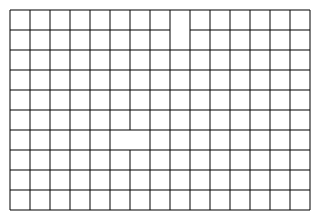

In [6]:
mon_laby = Labyrinthe(10, 15)
mon_laby.ouvrir_passage((3, 5), (3, 6))
mon_laby.ouvrir_passage((8, 8), (9, 8))
mon_laby.afficher()

<div style='background-color: #ffc154;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Génération d'un labyrinthe parfait avec la méthode <i>diviser pour régner</i></h2>
</div>

Pour générer un labyrinthe parfait, on utilise la méthode _diviser pour régner_ en appelant récursivement une méthode `_generer_rec` sur des sous-grilles obtenus en coupant la grille en deux, puis en ouvrant un passage entre les deux sous-labyrinthes ainsi construits.

<table>
    <tr>
        <td width="30%">
            <center>
            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby1.svg"><br>
            Coupe en deux zones rectangulaires
            </center>
        </td>
        <td width="30%">
            <center>
            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby2.svg"><br>
            Appels récursifs de <code>_generer_rec</code>
            </center>
        </td>
        <td width="30%">
            <center>
            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby3.svg"><br>
            Ouverture d'un passage entre les deux zones
            </center>
        </td>
    </tr>
</table>

Le cas de base correspond à la situation où la grille est composée d'une seule ligne ou d'une seule colonne. Il suffit alors de supprimer tous les murs intérieurs de la grille.

<table>
    <tr>
        <td width="45%">
            <center>
                <table>
                    <tr>
                        <td>
                            <center>
                            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby4.svg">
                            Avant
                            </center>
                        </td>
                        <td>
                            <center>
                            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby5.svg">
                            Après
                            </center>
                        </td>
                    </tr>
                </table>
            <br>
            Exemple dans le cas d'une seule ligne
            </center>
        </td>
        <td width="45%">
            <center>
            <table>
                <tr>
                    <td>
                            <center>
                            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby6.svg">
                            Avant
                            </center>
                        </td>
                        <td>
                            <center>
                            <img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/laby7.svg">
                            Après
                            </center>
                        </td>
                </tr>
            </table>
            <br>
            Exemple dans le cas d'une seule colonne
            </center>
        </td>
    </tr>
</table>

**(5)** Recopier et compléter la définition des méthodes `_generer_rec` et `generer` dans la classe `Labyrinthe`.

```python
    def _generer_rec(self, l1, c1, l2, c2):
        """
        Génère récursivement un labyrinthe parfait dans la zone rectangulaire
        dont un coin est la case de coordonnées (l1, c1) et dont le coin opposé
        est la case de coordonnées (l2, c2).
        - Entrées : l1, c1, l2, c2 (entiers avec l1 <= l2 et c1 <= c2)
        """
        if l1 == l2: # Si la zone est une seule ligne, on ouvre tous les murs intérieurs à cette zone...
            for c in range(......, ......):
                self.ouvrir_passage((l1, c), (l1, c+1))
        elif c1 == c2: # Si la zone est une seule colonne, on ouvre tous les murs intérieurs à cette zone...
            for ......:
                self.ouvrir_passage(......)
        else: # Sinon, la zone est composée d'au moins deux lignes et d'au moins deux colonnes...
            delta_l, delta_c = abs(l1 - l2), abs(c1 - c2)
            if randint(0, delta_l + delta_c - 1) < delta_l: # Coupe horizontale
                l = alea(l1, l2-1)
                c = randint(c1, c2)
                self.ouvrir_passage((l, c), (l+1, c))
                self._generer_rec(l1, c1, l, c2)
                self._generer_rec(l+1, c1, l2, c2)
            else: # Coupe verticale
                l = randint(......)
                c = alea(......)
                self.ouvrir_passage(......)
                self._generer_rec(......)
                self._generer_rec(......)
            
    def generer(self):
        """
        Génère un labyrinthe parfait.
        """
        self._generer_rec(0, 0, ......, ......)
```

_Remarque :_ Dans un premier temps, la fonction `alea` sera la fonction `randint` du module `random`.

In [7]:
from random import randint
alea = randint

In [8]:
class Labyrinthe:
    def __init__(self, nb_l, nb_c):
        self.hauteur = nb_l
        self.largeur = nb_c
        self.cases = [[Case() for j in range(self.largeur)] for i in range(self.hauteur)]
        self.generer()
        
    def ouvrir_passage(self, couple1, couple2):
        """
        Ouvre le passage entre deux cases voisines.
        - Entrées : couple1, couple2 (couples de coordonnées au format (ligne, colonne))
        """
        l1, c1 = couple1
        l2, c2 = couple2
        if abs(l1 - l2) == 1 and c1 == c2: # Ouverture verticale
            self.cases[min(l1, l2)][c1].S = False
            self.cases[max(l1, l2)][c1].N = False
        elif abs(c1 - c2) == 1 and l1 == l2: # Ouverture horinzontale
            self.cases[l1][min(c1, c2)].E = False
            self.cases[l1][max(c1, c2)].O = False

    def afficher(self):
        """
        Crée une représentation du labyrinthe au format SVG.
        - Sortie : d (instance de la classe Drawing du module drawSvg)
        Remarque : l'appel (sans affecation) à cette méthode sur la dernière ligne
        d'une cellule du notebook provoque l'affichage du labyrinthe sous la cellule.
        """
        def trait(l1, c1, l2, c2):
            return draw.Line((c1+0.5)*taille_case, (l1+0.5)*taille_case,
                             (c2+0.5)*taille_case, (l2+0.5)*taille_case,
                             stroke="black", stroke_width=1)
        taille_case = 20
        d = draw.Drawing((self.largeur + 1)*taille_case, (self.hauteur + 1)*taille_case)
        for i in range(self.hauteur):
            for j in range(self.largeur):
                if self.cases[i][j].N:
                    d.append(trait(i, j, i, j+1))
                if self.cases[i][j].O:
                    d.append(trait(i, j, i+1, j))
            if self.cases[i][self.largeur-1].E:
                d.append(trait(i, self.largeur, i+1, self.largeur))
        for j in range(self.largeur):
            if self.cases[self.hauteur-1][j].S:
                d.append(trait(self.hauteur, j, self.hauteur, j+1))
        return d
            
    def _generer_rec(self, l1, c1, l2, c2):
        """
        Génère récursivement un labyrinthe parfait dans la zone rectangulaire
        dont un coin est la case de coordonnées (l1, c1) et dont le coin opposé
        est la case de coordonnées (l2, c2).
        - Entrées : l1, c1, l2, c2 (entiers avec l1 <= l2 et c1 <= c2)
        """
        if l1 == l2:
            for c in range(c1, c2):
                self.ouvrir_passage((l1, c), (l1, c+1))
        elif c1 == c2:
            for l in range(l1, l2):
                self.ouvrir_passage((l, c1), (l+1, c1))
        else:
            delta_l, delta_c = abs(l1 - l2), abs(c1 - c2)
            if randint(0, delta_l + delta_c - 1) < delta_l: # Découpage partie haute / partie basse
                l = alea(l1, l2-1)
                c = randint(c1, c2)
                self.ouvrir_passage((l, c), (l+1, c))
                self._generer_rec(l1, c1, l, c2)
                self._generer_rec(l+1, c1, l2, c2)
            else: # Découpage partie gauche / partie droite
                l = randint(l1, l2)
                c = alea(c1, c2-1)
                self.ouvrir_passage((l, c), (l, c+1))
                self._generer_rec(l1, c1, l2, c)
                self._generer_rec(l1, c+1, l2, c2)
            
    def generer(self):
        """
        Génère un labyrinthe parfait.
        """
        self._generer_rec(0, 0, self.hauteur - 1, self.largeur - 1)

**(6)** Afficher un labyrinthe parfait composé de 10 lignes et de 15 colonnes.

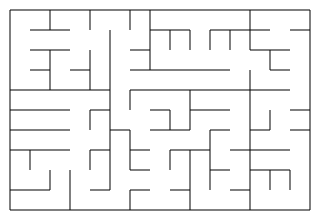

In [11]:
Labyrinthe(10, 15).afficher()

<div style='background-color: #ffc154;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Amélioration</h2>
</div>

**(7)** Afficher la spécification de la fonction `gauss` du module `random`, puis expliquer ce que renvoie l'appel `gauss(0, 1)`.

In [12]:
from random import gauss
help(gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



In [13]:
gauss(0, 1)

-0.42176491405444405

L'appel `gauss(0, 1)` renvoie un nombre réel en simulant une variable aléatoire qui suit la loi normale centrée et réduite.

**(8)** Redéfinir la fonction `alea` pour qu'elle prenne deux paramètres d'entrée `val_min` et `val_max` et qu'elle choisisse une valeur aléatoire `val`.

La loi de probabilité de `val` sera la loi normale de moyenne `(val_min + val_max) / 2` et d'écart-type `(val_max - val_min) / 6`.

La fonction renverra un entier compris entre `val_min` et `val_max` :
- l'arrondi de `val` si cet arrondi est compris entre `val_min` et `val_max`,
- `val_min` si l'arrondi de `val` est inférieur à `val_min`,
- `val_max` si l'arrondi de `val` est supérieur à `val_max`.

Par exemple, 100000 appels `alea(0, 20)` devraient aboutir à un répartition de ce type :

<img src="https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/gauss.svg" width="60%">

In [14]:
def alea(val_min, val_max):
    """
    Tire un entier aléatoire dans un intervalle avec une répartition gaussienne.
    - Entrées : val_min, val_max (entiers)
    - Sortie : (entier)
    """
    moyenne = (val_min + val_max) / 2
    ecart_type = (val_max - val_min) / 6
    return max(val_min, min(val_max, round(gauss(moyenne, ecart_type))))

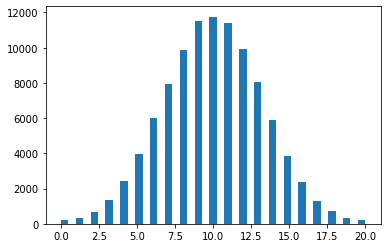

In [15]:
import matplotlib.pyplot as plt

liste = []
for _ in range(100000):
    liste.append(alea(0, 20))
        
plt.hist(liste, bins=41)
plt.show()

**(9)** Afficher un labyrinthe parfait composé de 20 lignes et de 30 colonnes.

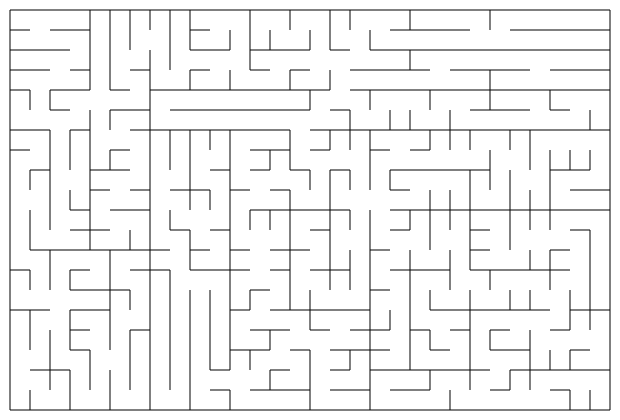

In [16]:
Labyrinthe(20, 30).afficher()